In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        # "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store accuracy
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        print(f"{name} Accuracy:", accuracy)
        model_performance.append({"Model": name, "Accuracy": accuracy})

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=1)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    print(f"Sequential Model Accuracy: {accuracy}")
    print(f"Sequential Model Loss: {loss}")
    model_performance.append({"Model": "Sequential", "Accuracy": accuracy})

    return pd.DataFrame(model_performance)

In [5]:
df = pd.read_csv("covid.csv")
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [6]:
df.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [7]:
df.duplicated().sum()

812049

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [10]:
df["CLASIFFICATION_FINAL"].nunique()

7

In [11]:
df["CLASIFFICATION_FINAL"].unique()

array([3, 5, 7, 6, 1, 2, 4])

In [12]:
df["CLASIFFICATION_FINAL"] = df["CLASIFFICATION_FINAL"].apply(lambda x: 1 if x <=3 else 0)
df["DATE_DIED"] = df["DATE_DIED"].apply(lambda x: 1 if x != "9999-99-99" else 0)

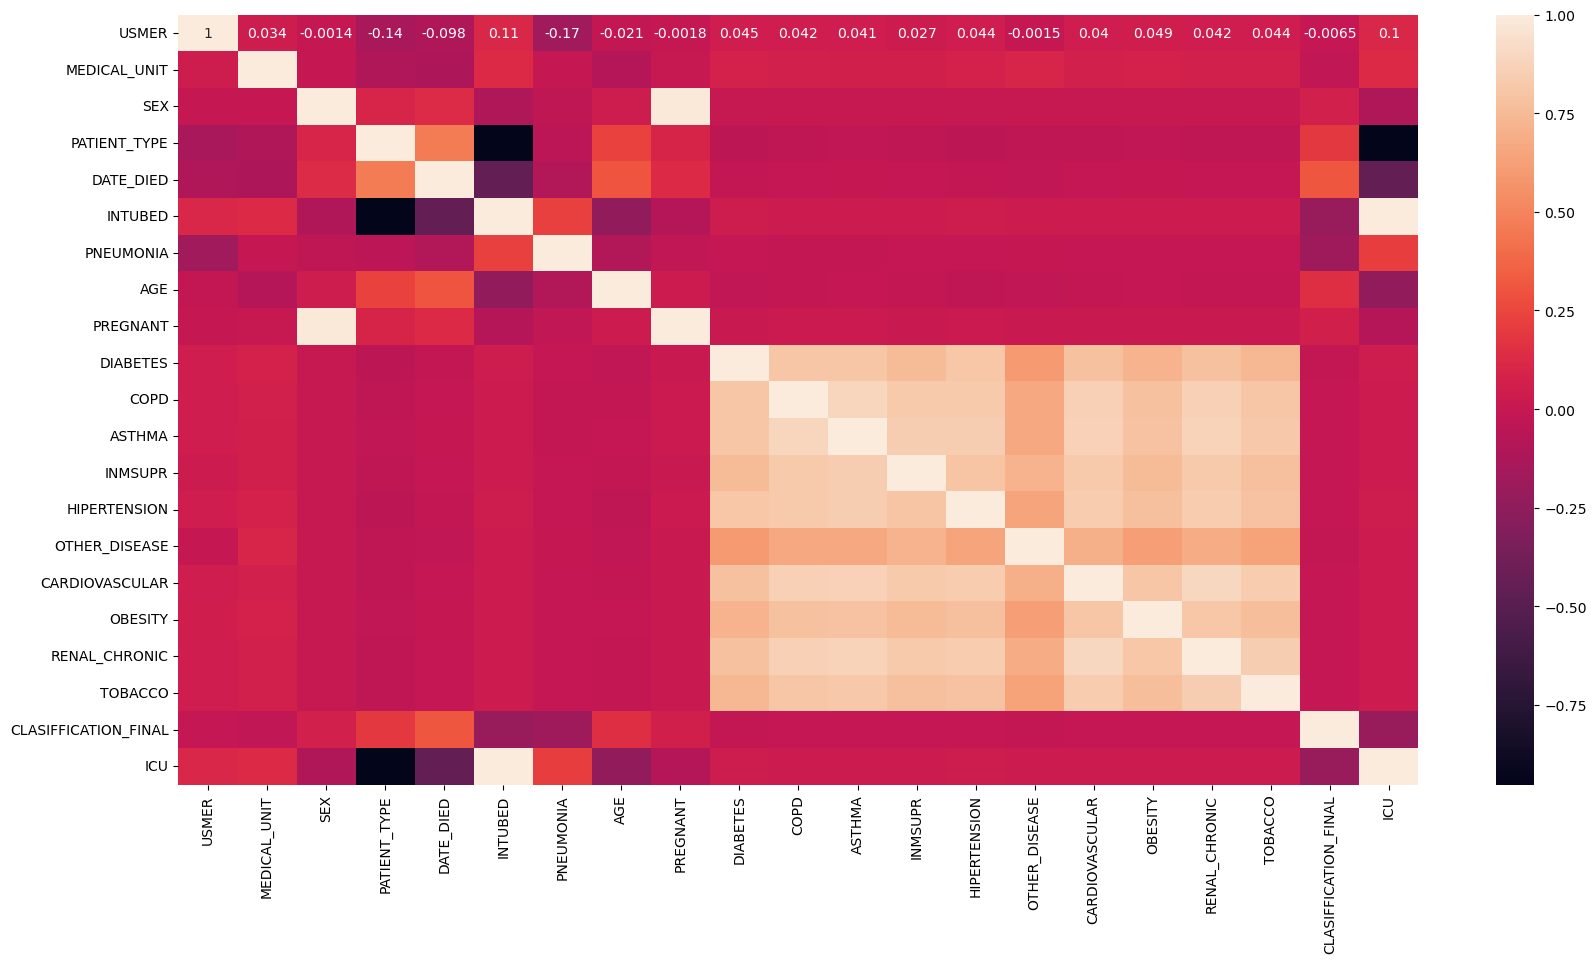

In [13]:
plt.figure(figsize=(20,10))
relations = df.corr()
sns.heatmap(data=relations, annot=True)
plt.show()

In [14]:
df["DATE_DIED"].value_counts()

DATE_DIED
0    160561
1     75965
Name: count, dtype: int64

In [15]:
df.drop(['ICU', 'INTUBED'], axis=1, inplace=True)

In [24]:
X, y = df.drop("DATE_DIED", axis=1), df["DATE_DIED"]

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.9351548530148058
DecisionTreeClassifier Accuracy: 0.9300574589323606
RandomForestClassifier Accuracy: 0.9324464153732447
KNeighborsClassifier Accuracy: 0.9318932837422216
GradientBoostingClassifier Accuracy: 0.939980449657869
GaussianNB Accuracy: 0.9228142955916363
Epoch 1/50
83886/83886 [==============================] - 38s 451us/step - loss: 0.1340 - accuracy: 0.9368
Epoch 2/50
83886/83886 [==============================] - 43s 513us/step - loss: 0.1292 - accuracy: 0.9384
Epoch 3/50
83886/83886 [==============================] - 41s 483us/step - loss: 0.1286 - accuracy: 0.9387
Epoch 4/50
83886/83886 [==============================] - 37s 445us/step - loss: 0.1281 - accuracy: 0.9386
Epoch 5/50
83886/83886 [==============================] - 38s 454us/step - loss: 0.1280 - accuracy: 0.9388
Epoch 6/50
83886/83886 [==============================] - 38s 451us/step - loss: 0.1278 - accuracy: 0.9389
Epoch 7/50
83886/83886 [==============================] - 41s

,Model,Accuracy
0,LogisticRegression,0.935155
1,DecisionTreeClassifier,0.930057
2,RandomForestClassifier,0.932446
3,KNeighborsClassifier,0.931893
4,GradientBoostingClassifier,0.939980
5,GaussianNB,0.922814
6,Sequential,0.939709


In [23]:
df_majority = df[df['DATE_DIED'] == 0]
df_minority = df[df['DATE_DIED'] == 1]

# Downsample the majority class
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

df_sampled = df_balanced.sample(frac=0.5, random_state=42)

In [25]:
X, y = df_sampled.drop("DATE_DIED", axis=1), df_sampled["DATE_DIED"]

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.7678536167972092
DecisionTreeClassifier Accuracy: 0.7292832225366945
RandomForestClassifier Accuracy: 0.7649575462383993
KNeighborsClassifier Accuracy: 0.7718686237082867
GradientBoostingClassifier Accuracy: 0.8012242480089515
GaussianNB Accuracy: 0.7584413874810768
Epoch 1/50
6078/6078 [==============================] - 4s 629us/step - loss: 0.4683 - accuracy: 0.7764
Epoch 2/50
6078/6078 [==============================] - 4s 602us/step - loss: 0.4552 - accuracy: 0.7850
Epoch 3/50
6078/6078 [==============================] - 3s 576us/step - loss: 0.4486 - accuracy: 0.7888
Epoch 4/50
6078/6078 [==============================] - 3s 510us/step - loss: 0.4415 - accuracy: 0.7927
Epoch 5/50
6078/6078 [==============================] - 3s 527us/step - loss: 0.4361 - accuracy: 0.7967
Epoch 6/50
6078/6078 [==============================] - 3s 484us/step - loss: 0.4329 - accuracy: 0.7978
Epoch 7/50
6078/6078 [==============================] - 3s 482us/step - loss: 

,Model,Accuracy
0,LogisticRegression,0.767854
1,DecisionTreeClassifier,0.729283
2,RandomForestClassifier,0.764958
3,KNeighborsClassifier,0.771869
4,GradientBoostingClassifier,0.801224
5,GaussianNB,0.758441
6,Sequential,0.796617


In [27]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('DATE_DIED', axis=1), df['DATE_DIED'], 
                                                    test_size=0.5, random_state=42, stratify=df['DATE_DIED'])
scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train, y_test)
models

LogisticRegression Accuracy: 0.776303662176674
DecisionTreeClassifier Accuracy: 0.7436899114685066
RandomForestClassifier Accuracy: 0.7702409037484251
KNeighborsClassifier Accuracy: 0.7765827012675139
GradientBoostingClassifier Accuracy: 0.8061608448965442
GaussianNB Accuracy: 0.71717274210869
Epoch 1/50
11827/11827 [==============================] - 7s 609us/step - loss: 0.4352 - accuracy: 0.7850
Epoch 2/50
11827/11827 [==============================] - 6s 505us/step - loss: 0.4240 - accuracy: 0.7926
Epoch 3/50
11827/11827 [==============================] - 6s 487us/step - loss: 0.4169 - accuracy: 0.7950
Epoch 4/50
11827/11827 [==============================] - 6s 503us/step - loss: 0.4097 - accuracy: 0.7991
Epoch 5/50
11827/11827 [==============================] - 6s 503us/step - loss: 0.4041 - accuracy: 0.8014
Epoch 6/50
11827/11827 [==============================] - 6s 538us/step - loss: 0.4005 - accuracy: 0.8032
Epoch 7/50
11827/11827 [==============================] - 6s 529us/st

,Model,Accuracy
0,LogisticRegression,0.776304
1,DecisionTreeClassifier,0.743690
2,RandomForestClassifier,0.770241
3,KNeighborsClassifier,0.776583
4,GradientBoostingClassifier,0.806161
5,GaussianNB,0.717173
6,Sequential,0.809382
